# Step 1: Data Loading
We'll start by loading the dataset using Python and Pandas.

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\Narthana\\Downloads\\colors.csv")

# Display the first few rows of the dataset
print(data.head())


             Color_Name            Color_Label Hex_Code    R    G    B
0   air_force_blue_usaf  Air Force Blue (Usaf)  #00308f    0   48  143
1  air_superiority_blue   Air Superiority Blue  #72a0c1  114  160  193
2       alabama_crimson        Alabama Crimson  #a32638  163   38   56
3            alice_blue             Alice Blue  #f0f8ff  240  248  255
4      alizarin_crimson       Alizarin Crimson  #e32636  227   38   54


# Explanation:

I import the Pandas library to work with data in a tabular format.

I used the pd.read_csv() function to load the dataset from the "colors.csv" file.

I then display the first few rows of the dataset using data.head() to get an initial look at the data.


# Step 2: Data Cleaning
Data cleaning involves handling missing values and ensuring the data is in the right format.

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Data type conversion
data['Hex_Code'] = data['Hex_Code'].str.strip()  # Remove leading/trailing spaces

# Ensure RGB values are integers
data['R'] = data['R'].astype(int)
data['G'] = data['G'].astype(int)
data['B'] = data['B'].astype(int)

# Check data types
data_types = data.dtypes
print("\nData types:\n", data_types)


Missing values:
 Color_Name     0
Color_Label    0
Hex_Code       0
R              0
G              0
B              0
dtype: int64

Data types:
 Color_Name     object
Color_Label    object
Hex_Code       object
R               int32
G               int32
B               int32
dtype: object


# Explanation:

I checked for missing values in the dataset using data.isnull().sum(). If there are any missing values, they need to be handled appropriately.

I removed any leading or trailing spaces from the 'Hex_Code' column using str.strip().

I converted the RGB values ('R', 'G', 'B') to integers to ensure they are in the correct data type for further analysis.

I checked the data types of the columns in the dataset.

At this point, I have loaded the dataset and cleaned it by handling missing values and ensuring the data is in the correct format. The next steps would involve exploratory data analysis (EDA) and data visualization, which can help you gain insights into the dataset and make predictions based on color information.

# Step 3: Exploratory Data Analysis (EDA)
EDA involves understanding the dataset's characteristics, distribution, and relationships between variables. We can calculate basic statistics and explore the dataset.

In [6]:
# Summary statistics
summary_stats = data.describe()
print("\nSummary Statistics:\n", summary_stats)

# Unique color labels
unique_labels = data['Color_Label'].nunique()
print("\nNumber of Unique Color Labels:", unique_labels)



Summary Statistics:
                 R           G           B
count  864.000000  864.000000  864.000000
mean   158.674769  124.667824  119.031250
std     85.358623   76.313053   78.371535
min      0.000000    0.000000    0.000000
25%    101.000000   64.000000   53.000000
50%    178.000000  123.000000  118.500000
75%    236.250000  190.000000  186.000000
max    255.000000  255.000000  255.000000

Number of Unique Color Labels: 864


# Explanation:

I calculated summary statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values for numerical columns, using data.describe().

I found the number of unique color labels using data['Color_Label'].nunique().

# Step 4: Data Visualization
Data visualization is a crucial part of data analysis to better understand the dataset. We'll create some visualizations for the dataset.

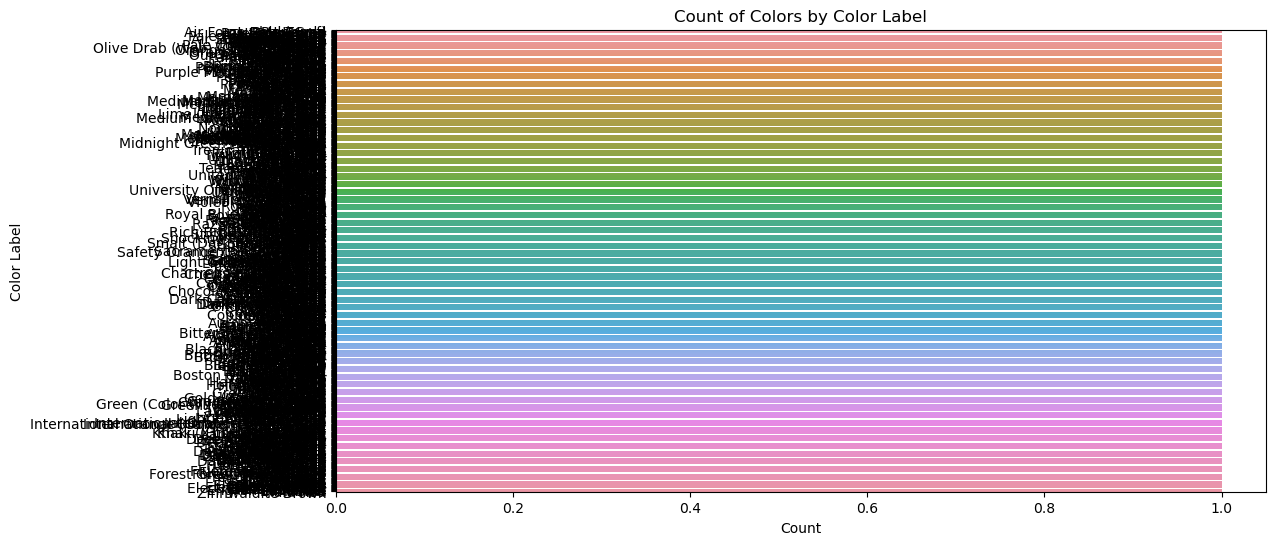

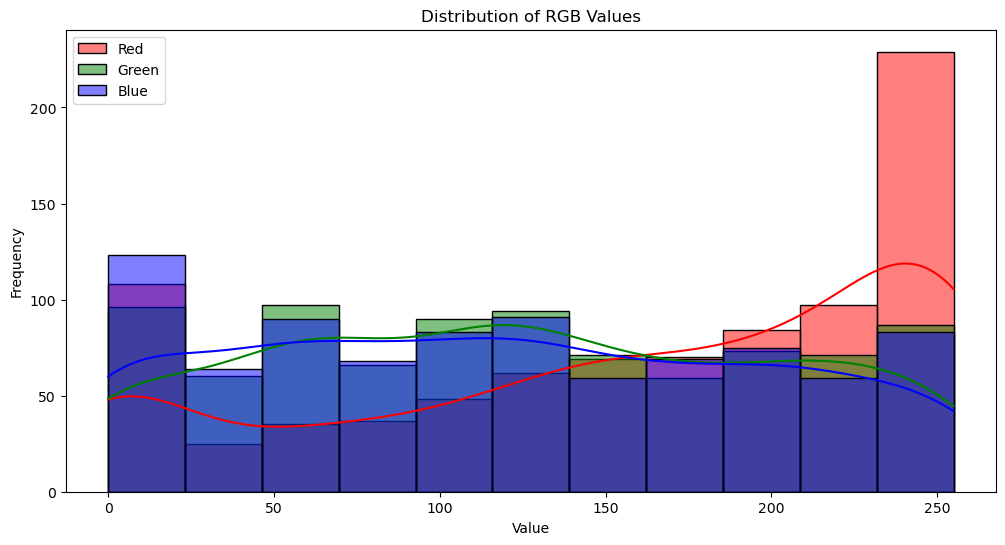

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of colors by Color Label
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Color_Label', order=data['Color_Label'].value_counts().index)
plt.title('Count of Colors by Color Label')
plt.xlabel('Count')
plt.ylabel('Color Label')
plt.show()

# Distribution of RGB values
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='R', kde=True, color='red', label='Red')
sns.histplot(data=data, x='G', kde=True, color='green', label='Green')
sns.histplot(data=data, x='B', kde=True, color='blue', label='Blue')
plt.title('Distribution of RGB Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Explanation:

I used Matplotlib and Seaborn for data visualization.

The first visualization is a count plot of colors by their labels to see the distribution of colors.

The second visualization is a histogram of the RGB values to understand the distribution of each color channel (Red, Green, Blue).

#  Correlation Heatmap
You can visualize the correlation between RGB values using a heatmap:

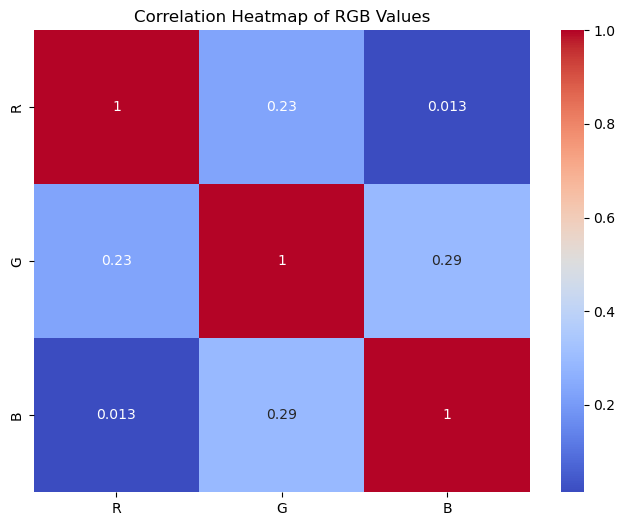

In [8]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[['R', 'G', 'B']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of RGB Values')
plt.show()


# Explanation:

This heatmap shows the correlation between the Red (R), Green (G), and Blue (B) values. A high positive correlation suggests that the channels are related, while a negative correlation suggests an inverse relationship.

#  Color Distribution
You can create a bar chart to visualize the distribution of colors based on their hex codes:

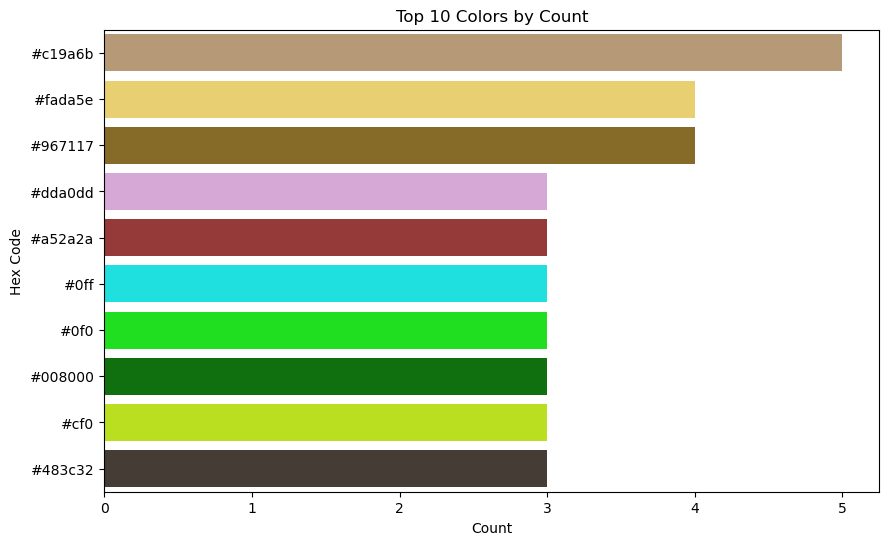

In [9]:
# Top N colors by count
n = 10  # You can adjust this to show the top N colors
top_colors = data['Hex_Code'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_colors.values, y=top_colors.index, palette=top_colors.index)
plt.title(f'Top {n} Colors by Count')
plt.xlabel('Count')
plt.ylabel('Hex Code')
plt.show()


# Explanation:

This bar chart shows the top N colors in your dataset by their hex codes. You can adjust n to show more or fewer top colors.

#  Color Distribution by Labels
Visualize the distribution of colors by their labels:

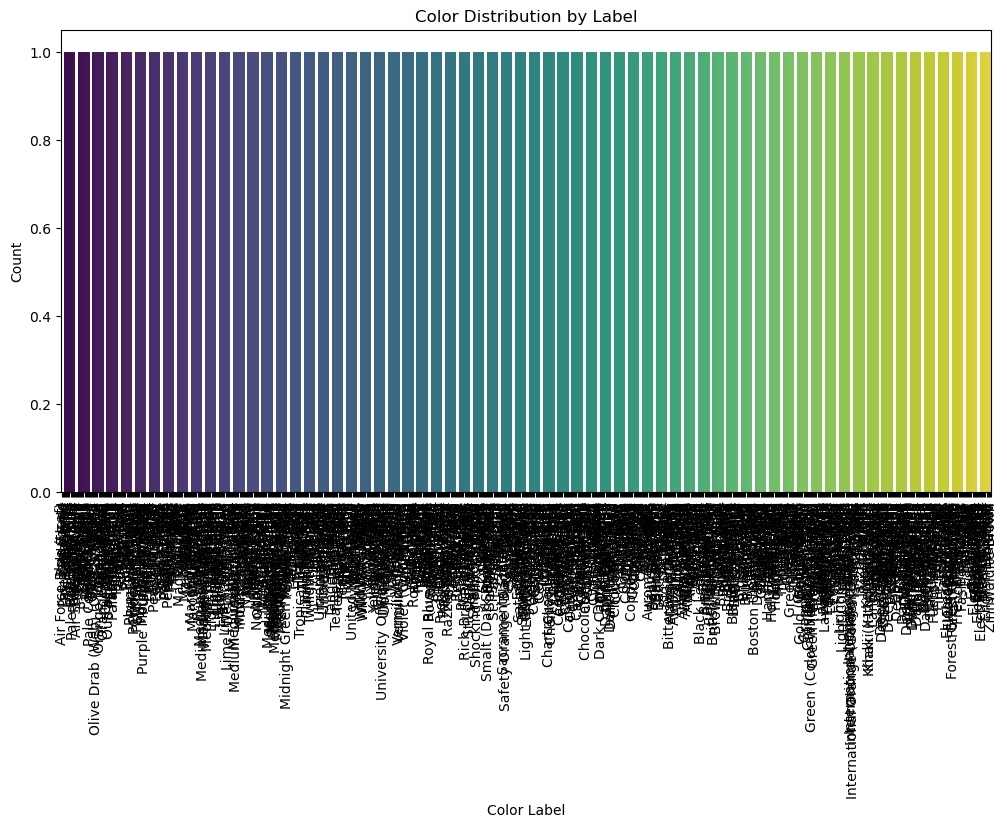

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Color_Label', order=data['Color_Label'].value_counts().index, palette='viridis')
plt.title('Color Distribution by Label')
plt.xlabel('Color Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# Explanation:

This count plot shows how colors are distributed across different color labels. It helps you understand the most common color labels in your dataset.

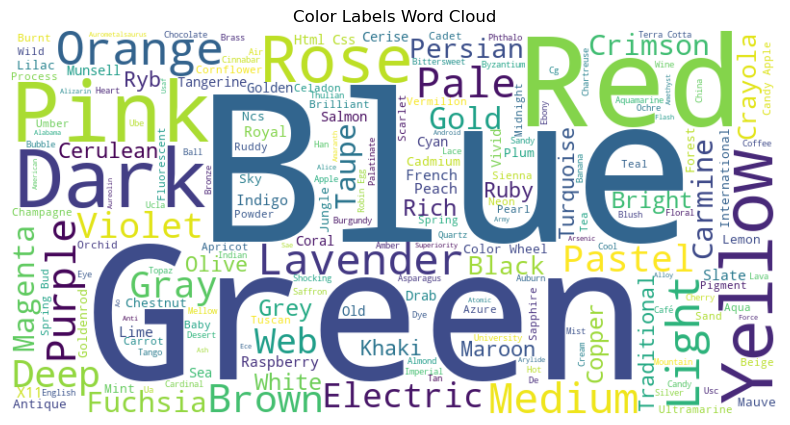

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all color labels into a single string
color_labels_text = " ".join(data['Color_Label'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(color_labels_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Color Labels Word Cloud")
plt.show()


# Explanation:

I first concatenated all the color labels into a single string using join.

I then created a word cloud using the WordCloud class from the wordcloud library.

The word cloud is displayed using Matplotlib.

Keep in mind that the word cloud visualizes text data. In this case, we are representing color labels as "words" in the word cloud, showing the most common color labels in a visually appealing manner.

# Step 5: Color Prediction Using Machine Learning
# Data Preparation

Before building a machine learning model, you need to prepare the data. This includes splitting the dataset into features (RGB values) and the target variable (Color Label).

In [13]:
from sklearn.model_selection import train_test_split

# Define features (RGB values) and target variable (Color Label)
X = data[['R', 'G', 'B']]
y = data['Color_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building
In this example, we'll use a simple decision tree classifier. You can experiment with other algorithms like Random Forest, K-Nearest Neighbors, or Neural Networks depending on the dataset and requirements.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


# Explanation:

I splited the data into features (X contains RGB values) and the target variable (y contains Color Label).

I used a decision tree classifier as a simple machine learning model.

The model is trained on the training data (X_train and y_train).

# PREDICTION

In [16]:
# Example RGB values for prediction
new_rgb_values = [[100, 150, 200],  # You can change these RGB values
                   [255, 0, 0],      # to the values you want to predict.
                   [0, 255, 0]]

# Make predictions for the new RGB values
predicted_colors = clf.predict(new_rgb_values)

# Display the predicted color labels
print("Predicted Color Labels:")
for rgb, color in zip(new_rgb_values, predicted_colors):
    print(f"RGB {rgb} -> Predicted Color: {color}")


Predicted Color Labels:
RGB [100, 150, 200] -> Predicted Color: Cornflower Blue
RGB [255, 0, 0] -> Predicted Color: Rosso Corsa
RGB [0, 255, 0] -> Predicted Color: Electric Green


C:\Users\Narthana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Support Vector Machine (SVM)

In [17]:
from sklearn.svm import SVC

# Create and train an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions using the trained SVM model
y_pred_svm = svm_classifier.predict(X_test)

# Example RGB values for prediction
new_rgb_values = [[100, 150, 200],  # You can change these RGB values
                   [255, 0, 0],      # to the values you want to predict.
                   [0, 255, 0]]

# Make predictions for the new RGB values using the SVM model
predicted_colors_svm = svm_classifier.predict(new_rgb_values)

# Display the predicted color labels
print("Predicted Color Labels with SVM:")
for rgb, color in zip(new_rgb_values, predicted_colors_svm):
    print(f"RGB {rgb} -> Predicted Color: {color}")


Predicted Color Labels with SVM:
RGB [100, 150, 200] -> Predicted Color: Blue Gray
RGB [255, 0, 0] -> Predicted Color: Candy Apple Red
RGB [0, 255, 0] -> Predicted Color: Green (Color Wheel) (X11 Green)


C:\Users\Narthana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


To create a color graph for both prediction results (Decision Tree Classifier and SVM), you can use color swatches or bars to visually represent the predicted colors for the RGB values you input. Here's how you can create color graphs using matplotlib:

C:\Users\Narthana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Narthana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


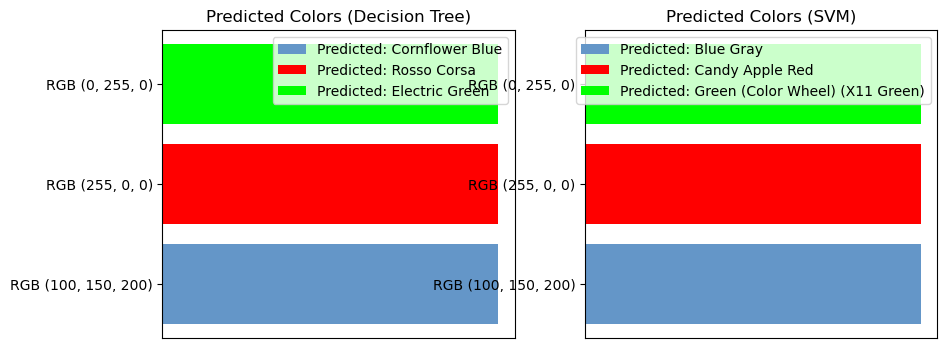

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# RGB values for prediction
new_rgb_values = np.array([[100, 150, 200],
                           [255, 0, 0],
                           [0, 255, 0]])

# Predicted colors
predicted_colors_dt = clf.predict(new_rgb_values)
predicted_colors_svm = svm_classifier.predict(new_rgb_values)

# Create color swatches or bars for Decision Tree predictions
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
for i in range(len(new_rgb_values)):
    color = '#{:02x}{:02x}{:02x}'.format(*new_rgb_values[i])
    plt.barh([i], 1, color=color, label=f'Predicted: {predicted_colors_dt[i]}')
plt.title('Predicted Colors (Decision Tree)')
plt.xticks([])
plt.yticks([0, 1, 2], ['RGB (100, 150, 200)', 'RGB (255, 0, 0)', 'RGB (0, 255, 0)'])
plt.legend()

# Create color swatches or bars for SVM predictions
plt.subplot(1, 2, 2)
for i in range(len(new_rgb_values)):
    color = '#{:02x}{:02x}{:02x}'.format(*new_rgb_values[i])
    plt.barh([i], 1, color=color, label=f'Predicted: {predicted_colors_svm[i]}')
plt.title('Predicted Colors (SVM)')
plt.xticks([])
plt.yticks([0, 1, 2], ['RGB (100, 150, 200)', 'RGB (255, 0, 0)', 'RGB (0, 255, 0)'])
plt.legend()

plt.show()


To create a more interactive and visually appealing color prediction display, you can use a library like Plotly to build an interactive color swatch display. 

In [20]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [21]:
import plotly.graph_objects as go

# RGB values for prediction
new_rgb_values = [[100, 150, 200],
                   [255, 0, 0],
                   [0, 255, 0]]

# Predicted colors
predicted_colors_dt = clf.predict(new_rgb_values)
predicted_colors_svm = svm_classifier.predict(new_rgb_values)

# Create a figure for the Decision Tree predictions
fig_dt = go.Figure()

for i, rgb in enumerate(new_rgb_values):
    color = f'rgb({rgb[0]}, {rgb[1]}, {rgb[2]})'
    color_label = f'Predicted (DT): {predicted_colors_dt[i]}'
    fig_dt.add_trace(go.Scatter(x=[i], y=[1], mode='markers', marker=dict(size=100, color=color), text=color_label))

# Create a figure for the SVM predictions
fig_svm = go.Figure()

for i, rgb in enumerate(new_rgb_values):
    color = f'rgb({rgb[0]}, {rgb[1]}, {rgb[2]})'
    color_label = f'Predicted (SVM): {predicted_colors_svm[i]}'
    fig_svm.add_trace(go.Scatter(x=[i], y=[1], mode='markers', marker=dict(size=100, color=color), text=color_label))

# Set layout and show figures
fig_dt.update_layout(title="Predicted Colors (Decision Tree)",
                     xaxis=dict(tickvals=[0, 1, 2], ticktext=[f'RGB {rgb}' for rgb in new_rgb_values]),
                     yaxis=dict(visible=False))
fig_svm.update_layout(title="Predicted Colors (SVM)",
                      xaxis=dict(tickvals=[0, 1, 2], ticktext=[f'RGB {rgb}' for rgb in new_rgb_values]),
                      yaxis=dict(visible=False))

# Display the interactive figures
fig_dt.show()
fig_svm.show()


C:\Users\Narthana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Narthana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [22]:
pip install tensorflow opencv-python


Note: you may need to restart the kernel to use updated packages.


In [24]:
import cv2
import numpy as np
import tensorflow as tf

# Load a pre-trained model (MobileNetV2)
model = tf.keras.applications.MobileNetV2(weights="imagenet")
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

# Load and preprocess the image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return img

# Predict color from an image
def predict_color_from_image(image_path):
    img = load_and_preprocess_image(image_path)
    predictions = model.predict(img)
    predicted_class = decode_predictions(predictions, top=1)[0][0][1]
    return predicted_class

# Input image path
image_path = "C:\\Users\\Narthana\\Downloads\\istockphoto-1307606716-612x612.jpg" 

# Predict color
predicted_color = predict_color_from_image(image_path)
print(f"The predicted color of the image is: {predicted_color}")


1/1 [==============================] - 1s 930ms/step
The predicted color of the image is: sewing_machine


1/1 [==============================] - 1s 802ms/step


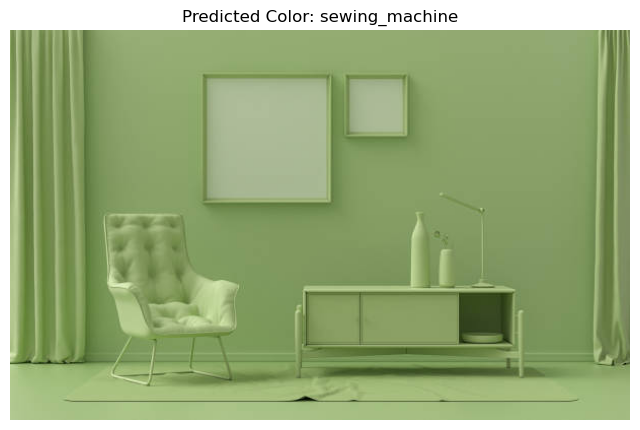

In [25]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load a pre-trained model (MobileNetV2)
model = tf.keras.applications.MobileNetV2(weights="imagenet")
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

# Load and preprocess the image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return img

# Predict color from an image
def predict_color_from_image(image_path):
    img = load_and_preprocess_image(image_path)
    predictions = model.predict(img)
    predicted_class = decode_predictions(predictions, top=1)[0][0][1]
    return predicted_class

# Input image path
image_path = "C:\\Users\\Narthana\\Downloads\\istockphoto-1307606716-612x612.jpg" 

# Predict color
predicted_color = predict_color_from_image(image_path)

# Load and display the image with the predicted color label
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted Color: {predicted_color}")
plt.show()
